In [45]:
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import geopandas as gpd
from pyprojroot import here

%matplotlib inline

# up figure resolution
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In this notebooks, several descriptive visualisations will be produced on Inside AirBnB's [Barcelona dataset](http://insideairbnb.com/barcelona/). The dataset contains seven files:

- detailed
    - calendar
    - listings
    - reviews
- summary
    - listings
    - reviews
- geospatial
    - neighbourhoods.csv
    - neighbourhoods.geojson
    
The summaries are supposedly a condensed subsets of the detailed datasets. Geospatial files will provide interesting builiding blocks for some good looking visualisations.

## Importing data

In [17]:
calendar_detailed = pd.read_csv(here() / 'data/raw/renamed/calendar_detailed.csv')
listings_detailed = pd.read_csv(here() / 'data/raw/renamed/listings_detailed.csv')
reviews_detailed = pd.read_csv(here() / 'data/raw/renamed/reviews_detailed.csv')

listings_summary = pd.read_csv(here() / 'data/raw/renamed/listings_summary.csv')
reviews_summary = pd.read_csv(here() / 'data/raw/renamed/reviews_summary.csv')

neighbourhoods_csv = pd.read_csv(here() / 'data/raw/renamed/neighbourhoods.csv')
neighbourhoods_json = gpd.read_file(here() / 'data/raw/renamed/neighbourhoods.geojson')

/Users/jalmarituominen/miniconda3/envs/TLO-32410/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Calendar detailed

It seems that `calendar_detailed` is a time series of dates when 

In [7]:
calendar_detailed.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,18666,2019-11-09,f,$130.00,$130.00,3,730
1,18666,2019-11-10,f,$130.00,$130.00,3,730
2,18666,2019-11-11,f,$130.00,$130.00,3,730
3,18666,2019-11-12,f,$130.00,$130.00,3,730
4,18666,2019-11-13,f,$130.00,$130.00,3,730


In [15]:
calendar_detailed.date = pd.to_datetime(calendar_detailed.date)

### Listings detailed

In [46]:
listings_detailed.head().T

,0,1,2,3,4
id,18666,18674,23197,25786,31958
listing_url,https://www.airbnb.com/rooms/18666,https://www.airbnb.com/rooms/18674,https://www.airbnb.com/rooms/23197,https://www.airbnb.com/rooms/25786,https://www.airbnb.com/rooms/31958
scrape_id,20191109094909,20191109094909,20191109094909,20191109094909,20191109094909
last_scraped,2019-11-09,2019-11-09,2019-11-09,2019-11-09,2019-11-09
name,Flat with Sunny Terrace,Huge flat for 8 people close to Sagrada Familia,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,"Gaudi Attic 1, Friendly Rentals"
summary,"Apartment located near the ""Plaza de las Glori...",110m2 apartment to rent in Barcelona. Located ...,I do not accept groups of young people under 2...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,"This apartment has: 1 double bed, 1 double sof..."
space,Nice apartment situated on the penthouse floor...,Apartment with 110 m2 located in the 6th floor...,Elegant spacious apartment suitable for 6. Amp...,Room available for rent.- PEDRO PEREZ. Share...,"This apartment has: 1 double bed, 1 double sof..."
description,"Apartment located near the ""Plaza de las Glori...",110m2 apartment to rent in Barcelona. Located ...,I do not accept groups of young people under 2...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,"This apartment has: 1 double bed, 1 double sof..."
experiences_offered,none,none,none,none,none
neighborhood_overview,Apartment in Barcelona near to the Plaza de la...,Apartment in Barcelona located in the heart of...,Strategically located in the area of Parc del ...,Solo decir que a menudo ni salgo del barrio. M...,El barrio de Gracia es uno de los más antiguo...


In [47]:
listings_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20428 entries, 0 to 20427
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.5+ MB


In [37]:
listings_detailed.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.042800e+04,2.042800e+04,0.0,0.0,0.0,2.042800e+04,0.0,20411.000000,20411.000000,20428.000000,...,15932.000000,15943.000000,15934.000000,15935.000000,0.0,20428.000000,20428.000000,20428.000000,20428.000000,16152.000000
mean,2.286960e+07,2.019111e+13,NaN,NaN,NaN,9.714553e+07,NaN,19.385527,19.385527,41.391990,...,9.543623,9.532585,9.597402,8.996235,NaN,14.716370,12.140053,2.129528,0.038672,1.861225
std,1.236744e+07,0.000000e+00,NaN,NaN,NaN,9.864641e+07,NaN,55.210249,55.210249,0.014976,...,0.926347,0.937811,0.776237,1.067738,NaN,30.366928,29.725386,8.702227,0.438483,1.766933
min,1.866600e+04,2.019111e+13,NaN,NaN,NaN,3.073000e+03,NaN,0.000000,0.000000,41.349540,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.326226e+07,2.019111e+13,NaN,NaN,NaN,8.359694e+06,NaN,1.000000,1.000000,41.380270,...,9.000000,9.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.440000
50%,2.415390e+07,2.019111e+13,NaN,NaN,NaN,5.200252e+07,NaN,3.000000,3.000000,41.388855,...,10.000000,10.000000,10.000000,9.000000,NaN,2.000000,0.000000,1.000000,0.000000,1.320000
75%,3.432116e+07,2.019111e+13,NaN,NaN,NaN,1.723129e+08,NaN,12.000000,12.000000,41.402160,...,10.000000,10.000000,10.000000,10.000000,NaN,11.000000,6.000000,2.000000,0.000000,2.860000
max,3.997381e+07,2.019111e+13,NaN,NaN,NaN,3.081175e+08,NaN,1258.000000,1258.000000,41.464010,...,10.000000,10.000000,10.000000,10.000000,NaN,155.000000,155.000000,97.000000,9.000000,31.210000


### Reviews detailed

In [9]:
reviews_detailed.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,18666,50158511,2015-10-10,1559265,Jody,Very nice flat. We had easy transportation to ...
1,18674,4808211,2013-05-27,4841196,Caron,"Great location. Clean, spacious flat. Would re..."
2,18674,10660311,2014-03-02,11600277,Juan Carlos,Mi mejor recomendación para este departamento....
3,18674,41087522,2015-08-04,35231385,Shlomi,"Big apartment, well equipped.\r\nVery good ser..."
4,18674,81000756,2016-06-20,23223644,Joost,The Check in was fast and flexible. The price ...


### Listings summary

In [10]:
listings_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324


In [32]:
listings_summary.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.042800e+04,2.042800e+04,20428.000000,20428.000000,20428.000000,20428.000000,20428.00000,16152.000000,20428.000000,20428.000000
mean,2.286960e+07,9.714553e+07,41.391990,2.167697,134.587429,8.736244,36.27335,1.861225,14.716370,183.984286
std,1.236744e+07,9.864641e+07,0.014976,0.017962,478.968270,18.702046,62.75757,1.766933,30.366928,134.907793
min,1.866600e+04,3.073000e+03,41.349540,2.077820,0.000000,1.000000,0.00000,0.010000,1.000000,0.000000
25%,1.326226e+07,8.359694e+06,41.380270,2.157120,39.000000,1.000000,1.00000,0.440000,1.000000,54.000000
50%,2.415390e+07,5.200252e+07,41.388855,2.168445,60.000000,2.000000,9.00000,1.320000,2.000000,179.000000
75%,3.432116e+07,1.723129e+08,41.402160,2.178070,105.000000,4.000000,43.00000,2.860000,11.000000,323.000000
max,3.997381e+07,3.081175e+08,41.464010,2.230570,15000.000000,900.000000,694.00000,31.210000,155.000000,365.000000


### Reviews summary

In [11]:
reviews_summary.head()

,listing_id,date
0,18666,2015-10-10
1,18674,2013-05-27
2,18674,2014-03-02
3,18674,2015-08-04
4,18674,2016-06-20


In [31]:
reviews_summary.describe()

,listing_id
count,7.409920e+05
mean,1.158323e+07
std,1.046486e+07
min,1.866600e+04
25%,2.278689e+06
50%,8.021692e+06
75%,1.930850e+07
max,3.992441e+07


### Neighbourhoods

In [12]:
neighbourhoods_csv.head()

,neighbourhood_group,neighbourhood
0,Ciutat Vella,el Barri Gòtic
1,Ciutat Vella,el Raval
2,Ciutat Vella,la Barceloneta
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera"
4,Eixample,el Fort Pienc


In [30]:
neighbourhoods_csv.describe()

,neighbourhood_group,neighbourhood
count,73,73
unique,10,73
top,Nou Barris,Hostafrancs
freq,13,1


### Neighbourhoods geojson

In [18]:
neighbourhoods_json.head()

,neighbourhood,neighbourhood_group,geometry
0,el Raval,Ciutat Vella,"MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3..."
1,el Barri Gòtic,Ciutat Vella,"MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3..."
2,la Dreta de l'Eixample,Eixample,"MULTIPOLYGON (((2.17093 41.40185, 2.17333 41.4..."
3,l'Antiga Esquerra de l'Eixample,Eixample,"MULTIPOLYGON (((2.15972 41.38301, 2.15859 41.3..."
4,la Nova Esquerra de l'Eixample,Eixample,"MULTIPOLYGON (((2.14999 41.37562, 2.14983 41.3..."


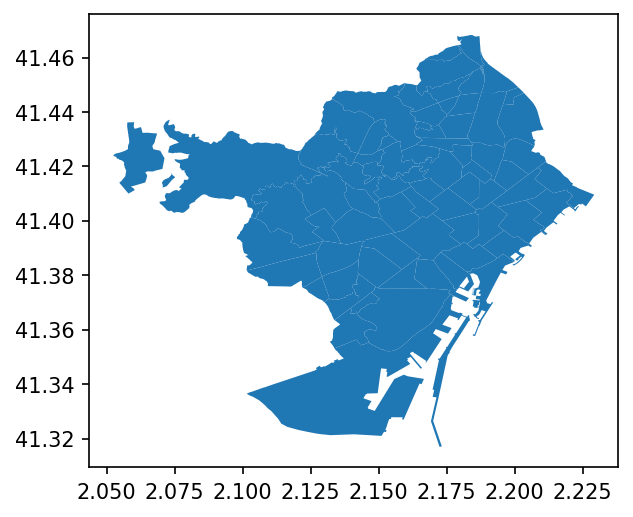

In [28]:
neighbourhoods_json.geometry.plot();